Bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

Dados

In [ ]:
df= pd.read_csv('diabetes.csv')

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: outcome, dtype: float64

In [ ]:
df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

Dados Treino e Teste

In [ ]:
X = df.drop('outcome',axis=1)
y = df['outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test.value_counts(normalize=True)

0    0.61039
1    0.38961
Name: outcome, dtype: float64

Feature Engineering

In [ ]:
 le = preprocessing.LabelEncoder()

In [ ]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)

In [ ]:
pd.DataFrame(X_train_sc)

,0,1,2,3,4,5,6,7
0,0.058824,0.557789,0.704918,0.191919,0.000000,0.448584,0.027754,0.033333
1,0.470588,0.527638,0.819672,0.363636,0.000000,0.645306,0.068745,0.400000
2,0.352941,0.427136,0.639344,0.000000,0.000000,0.464978,0.129804,0.350000
3,0.058824,0.733668,0.459016,0.000000,0.000000,0.442623,0.207515,0.133333
4,0.764706,0.532663,0.573770,0.000000,0.000000,0.509687,0.073868,0.516667
...,...,...,...,...,...,...,...,...
609,0.470588,0.497487,0.688525,0.000000,0.000000,0.527571,0.132365,0.483333
610,0.000000,0.432161,0.557377,0.323232,0.000000,0.533532,0.068318,0.066667
611,0.647059,0.683417,0.688525,0.353535,0.153664,0.421759,0.077711,0.350000
612,0.058824,1.000000,0.622951,0.434343,0.000000,0.639344,0.561913,0.016667


# Modelo

In [ ]:
#Treinando o Modelo

lr = LogisticRegression(random_state=0)

lr.fit(X_train_sc,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Treino 

#Previsões
y_train_proba = lr.predict_proba(X_train_sc) 
y_pred_train = lr.predict(X_train_sc)

# Teste

# Primeiro transformar o X_test usando 'transform' e não o 'fit_transform'
X_test_sc = scaler.transform(X_test)


#Previsões
y_proba = lr.predict_proba(X_test_sc) # pares de probabilidade para cada classe
y_pred = lr.predict(X_test_sc) 

## Métricas

Conjunto de Treino
Recall : 0.5384615384615384
Precision : 0.7724137931034483


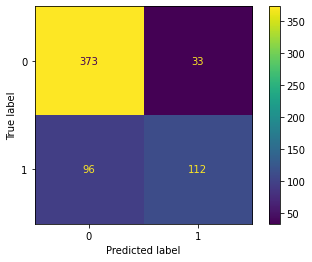

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, precision_recall_curve

import matplotlib.pyplot as plt

print('Conjunto de Treino')
print('Recall :',recall_score(y_train, y_pred_train))
print('Precision :',precision_score(y_train, y_pred_train))


cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



Recall : 0.45
Precision : 0.7941176470588235


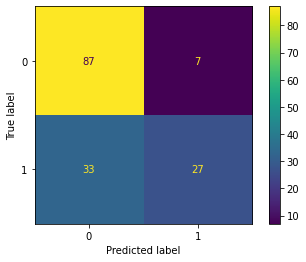

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, precision_recall_curve

import matplotlib.pyplot as plt

print('Conjunto de Teste')
print('Recall :',recall_score(y_test, y_pred))
print('Precision :',precision_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




# Ajuste de Threshold

In [ ]:
prec, recall, threshold = precision_recall_curve(y_train,y_train_proba[:,1])

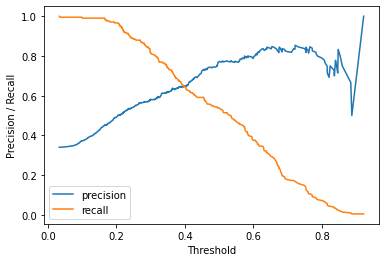

In [ ]:
import seaborn as sns

_ = sns.lineplot(x=threshold,y=prec[:-1],label='precision')
_ = sns.lineplot(x=threshold,y=recall[:-1],label='recall')
_ = plt.xlabel('Threshold')
_ = plt.ylabel('Precision / Recall')

In [ ]:
def find_intercept_thresh(arr_recall,arr_precision):

  '''
  Recebe os arrays the precisão e recall 
  e retorna o threshold de intersecção entre eles
  '''

  intercept = recall - prec

  index = np.where(intercept == np.min(abs(intercept)))[0][0]

  return print(threshold[index])

In [ ]:
# Este intercepto é caso eu queira um equilibrio entre recall e precision

find_intercept_thresh(recall,prec)

0.3962371431077066


# Novo modelo - Threshold Ajustado


In [ ]:
# Analisando a curva precision e recall através do conjunto de treino eu ao invés de querer equilibrio entre recall e precision
# quero um recall maior, pois não detectar diabetes e deixar a pessoa sem tratamento ( Falsos Negativos ) tem mais risco do que tratar mais ou submeter a exames quem não tem (Falsos Positivos) 
# Escolhi o threshold de 0.2 !

# Ainda no conjunto de testes

y_pred_train_new = (y_train_proba[:,1] >= 0.2) # 1 porque apenas olhamos pra coluna com a probabilidade de ser diabético e proba retorna os pares de probabilidade para 0 e 1

# Conjunto de treino 

y_pred_new = (y_proba[:,1] >= 0.2)

Conjunto de Treino
Recall : 0.9663461538461539
Precision : 0.49385749385749383


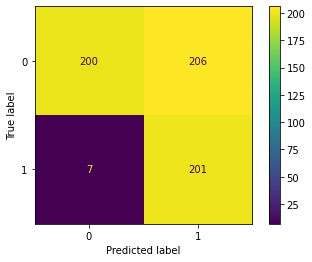

In [ ]:
print('Conjunto de Treino')
print('Recall :',recall_score(y_train, y_pred_train_new))
print('Precision :',precision_score(y_train, y_pred_train_new))


cm = confusion_matrix(y_train, y_pred_train_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



Conjunto de Teste
Recall : 0.8666666666666667
Precision : 0.49523809523809526


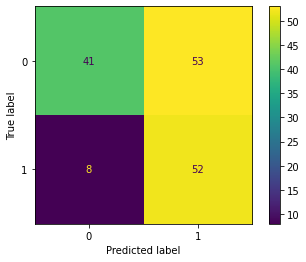

In [ ]:
# Agora para teste:

print('Conjunto de Teste')
print('Recall :',recall_score(y_test, y_pred_new))
print('Precision :',precision_score(y_test, y_pred_new))


cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



# Conclusões

Perceba que o threshold por default é 0.5 na regressão logística e ao menos que façamos uma nova decisão em cima das probabilidades que sairam do modelo "y_proba" não temos um ajuste de threshold dentro do modelo, exigindo um passo a mais manual. 
Não foi necessário retreinar o modelo isso porque o threshold é um step que é posterior ao treino, onde ele usa o limiar 0.5 para rotular todas probabilidades acima deste valor como "diabetes".
Escolher o melhor threshold é uma decisão de negócio, aceitar mais Falsos Positivos ou Falsos Negativos e a curva de Precision x Recall ajuda nessa decisão.
No fim priorizamos o recall com threshold de 0.2 e percebemos que ao invés de 33 Falsos Negativos, ou seja pacientes com diabetes que tinhamos dito que não tinham diabetes, agora temos apenas 8. Como consequência tivemos mais falsos Positivos de 7 -> 53. Não existe almoço grátis nesse caso, porém a consequencia de cuidar de pacientes sem diabetes seria menor do que não cuidar de pacientes com diabetes. 